In [0]:
!pip install pyspark
!pip install -U -q PyDrive
!apt install openjdk-8-jdk-headless -qq
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

In [0]:
!pip install PyDrive
!pip install geopandas
import re

In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from geopy.geocoders import Nominatim
from google.colab import files
import io
import plotly.graph_objects as go
import seaborn as sns

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
#idf = '1PN6TbhTwwl-hVII3P89IMbs1ashJ7BYz'
idf = '1QQ7k1Y5RvL0ZcnQuTVg0rHU6O5AK81zQ'
downloaded = drive.CreateFile({'id':idf})   # replace the id with id of file you want to access
downloaded.GetContentFile('flights.parquet') 
# Fuente del dataset: https://www.kaggle.com/divyansh22/flight-delay-prediction

In [0]:
from pyspark.sql import *
from pyspark.sql.functions import *
from pyspark import SparkContext
import pandas as pd
from pyspark.sql import SQLContext, SparkSession
from collections import Counter
from textblob import TextBlob
# create the Spark Session
spark = SparkSession.builder.getOrCreate()

# create the Spark Context
sc = spark.sparkContext

Trabajo Practico

In [10]:
uploaded=files.upload()

Saving traintp.csv to traintp (1).csv
Saving twiter_with_data_location.csv to twiter_with_data_location (1).csv


Obtencion Del CSV FREE DE NANO : Es funcion es para limpiar lo mas que se pueda aquellas Locaciones no validas

In [0]:
def quitaNoAlfaNum(texto):
  words=re.compile(r'\W+', re.UNICODE).split(texto)
  word_total=" "
  for word in words:
   word_total=word_total + " " + word
  return word_total

In [0]:
twiter=df = pd.read_csv(io.StringIO(uploaded['twiter_with_data_location.csv'].decode('utf-8')))
twiter["location_isnull"]=twiter.location.isnull()
twiter["location_free"]=twiter.loc[twiter.location_isnull == False].location.transform(quitaNoAlfaNum)
#twiter limpia#ndo sirecciones


# Obtencion del Data Frame con Country - City - Longitude - Latitude

In [0]:
#Esta funcion es para obtener los datos de loas locaciones de Data Frame
#geolocator = Nominatim(user_agent="orga_datos")
#def getGeoData(x):
#    l = geolocator.geocode(x, timeout=20)
#    if l == None:
#       return (None, None, None)
#    return ([l.address, l.latitude, l.longitude])

Aca creo la columna address_latitude_longitude del data frame esta linea demora unos 40 min

In [0]:
#twiter["address_latitude_longitude"] = twiter.loc[(twiter.location_isnull == False)&(twiter.location_free.isnull() == False )].location_free.transform(lambda x: getGeoData(x))

In [0]:
twiter_my=pd.read_csv(io.BytesIO(uploaded["twiter_with_data_location.csv"]))

Obtengo las latidudes y longitudes 

In [0]:
#def get_latitude(x):
#  latidude = x[1]
#  return latidude
#def get_longitude(x):
#  longitude = x[2]
#  return longitude

In [0]:
#twiter_my["latitude"]=twiter_my.loc[(twiter_my.location_isnull == False)&(twiter_my.location_free.isnull() == False )].address_latitude_longitude.transform(get_latitude)
#twiter_my["longitude"]=twiter_my.loc[(twiter_my.location_isnull == False)&(twiter_my.location_free.isnull() == False )].address_latitude_longitude.transform(get_longitude)
#twiter_my.loc[(twiter_my.location_isnull == False)&(twiter_my.location_free.isnull() == False )].head(3)

Obtengo Country y City

In [0]:
#def get_country(x):
#  if x[0] == None:
#    return None
#  country=x[0].split(",")[-1]
#  return country


In [0]:
#def get_city(x):
#  if x[0] == None:
#    return None
#  city=x[0].split(",")[0]
#  return city

In [0]:
#twiter_my["city"]=twiter_my.loc[(twiter_my.location_isnull == False)&(twiter_my.location_free.isnull() == False )].address_latitude_longitude.transform(get_city)
#twiter_my["country"]=twiter_my.loc[(twiter_my.location_isnull == False)&(twiter_my.location_free.isnull() == False )].address_latitude_longitude.transform(get_country)

In [0]:
twiter_my.loc[(twiter_my.location_isnull == False)&(twiter_my.location_free.isnull() == False )].head(3)

Bool que me indica si algun campo de la locacion en nula para poder manejar el erro del geopandas

In [0]:
twiter_my["locacion_isnull"]=twiter_my.location.isnull()
#tweets_with_clean_location.head(5)

Analisis de Sentimiento del texto


In [0]:
def subjectivityText(x):
  t=TextBlob(x)
  return t.sentiment.subjectivity

In [0]:
def polarityText(x):
  t=TextBlob(x)
  return t.sentiment.polarity

In [0]:
twiter_my["subjectivity_text"]=twiter_my.loc[twiter_my.location_free.isnull()==False].text.transform(subjectivityText)

In [0]:
twiter_my["polarity_text"]=twiter_my.loc[twiter_my.location_free.isnull()==False].text.transform(polarityText)

In [0]:
def pos(x):
  count =0
  for y in x :
    if(y>0):
      count=count+1
  return count

In [0]:
def neg(x):
  count =0
  for y in x :
    if(y<0):
      count=count+1
  return count

In [0]:
def neu(x):
  count =0
  for y in x :
    if(y==0):
      count=count+1
  return count

In [25]:
twiter_my_polarity=twiter_my.loc[twiter_my.location_free.isnull()==False].groupby("country").agg({"polarity_text":[pos,neg,neu,"mean","max","min"],"text":["count"]})
#.sort_values(by=['polarity_text'],ascending=False)
twiter_my_polarity

polarity_text                                            text
                      pos   neg   neu      mean       max       min count
country                                                                  
 Argentina            4.0   1.0   7.0  0.027778  0.300000 -0.200000    12
 Armenia              1.0   0.0   0.0  0.003788  0.003788  0.003788     1
 Australia           28.0  26.0  48.0  0.001320  0.850000 -1.000000   102
 Bangladesh           2.0   0.0   1.0  0.133333  0.300000  0.000000     3
 Barbados             2.0   0.0   1.0  0.066667  0.100000  0.000000     3
...                   ...   ...   ...       ...       ...       ...   ...
ประเทศไทย             1.0   0.0   2.0  0.003968  0.011905  0.000000     3
ປະເທດລາວ              3.0   0.0   3.0  0.127778  0.500000  0.000000     6
中国                    7.0   0.0   0.0  0.294079  0.535714  0.034091     7
日本                    2.0   1.0   2.0  0.131310  0.535714 -0.250000     5
대한민국                  1.0   0.0   1.0  0.017045  0.034091  0.000000     2

[185 rows x 7 columns]

In [0]:
level0=twiter_my_polarity.columns.get_level_values(0)
level1=twiter_my_polarity.columns.get_level_values(1)
twiter_my_polarity.columns=level0 + "_" + level1
twiter_my_polarity.reset_index(inplace=True)

In [27]:
#twiter_my_polarity_subjectivity.sort_values(by=['polarity_text_pos'],ascending=False)
twiter_my_polarity

,country,polarity_text_pos,polarity_text_neg,polarity_text_neu,polarity_text_mean,polarity_text_max,polarity_text_min,text_count
0,Argentina,4.0,1.0,7.0,0.027778,0.300000,-0.200000,12
1,Armenia,1.0,0.0,0.0,0.003788,0.003788,0.003788,1
2,Australia,28.0,26.0,48.0,0.001320,0.850000,-1.000000,102
3,Bangladesh,2.0,0.0,1.0,0.133333,0.300000,0.000000,3
4,Barbados,2.0,0.0,1.0,0.066667,0.100000,0.000000,3
...,...,...,...,...,...,...,...,...
180,ประเทศไทย,1.0,0.0,2.0,0.003968,0.011905,0.000000,3
181,ປະເທດລາວ,3.0,0.0,3.0,0.127778,0.500000,0.000000,6
182,中国,7.0,0.0,0.0,0.294079,0.535714,0.034091,7
183,日本,2.0,1.0,2.0,0.131310,0.535714,-0.250000,5


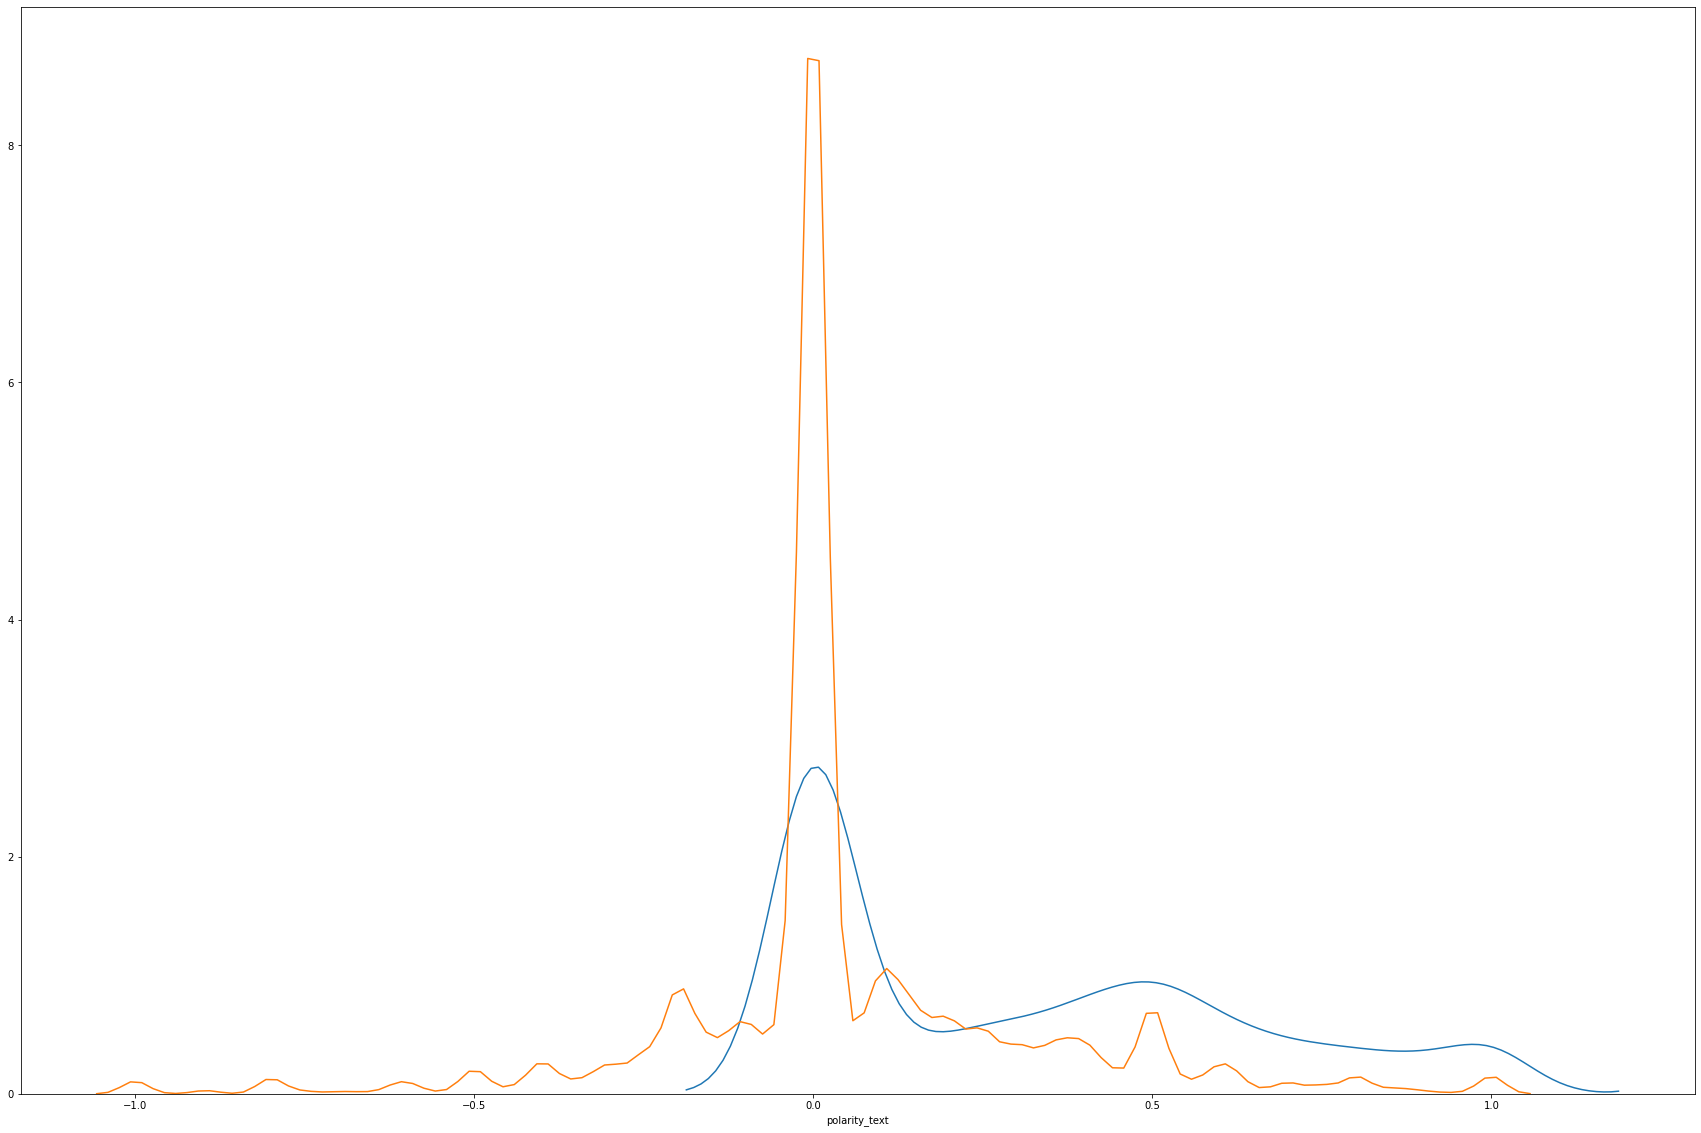

In [28]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (30, 20))
sns.distplot(twiter_my.loc[twiter_my.location_free.isnull()==False]["subjectivity_text"],ax = ax,hist=False)
sns.distplot(twiter_my.loc[twiter_my.location_free.isnull()==False]["polarity_text"],ax = ax,hist=False)

In [30]:
twiter_my_polarity_top10=twiter_my_polarity.sort_values(by=['polarity_text_pos'],ascending=False).head(10)
twiter_my_polarity_top10

,country,polarity_text_pos,polarity_text_neg,polarity_text_neu,polarity_text_mean,polarity_text_max,polarity_text_min,text_count
84,United States of America,669.0,390.0,841.0,0.056509,1.00,-1.000000,1900
83,United Kingdom,143.0,92.0,184.0,0.038399,1.00,-1.000000,419
10,Canada,74.0,47.0,104.0,0.075309,1.00,-0.800000,225
28,India,49.0,22.0,40.0,0.077690,0.80,-1.000000,111
157,United States,37.0,40.0,94.0,0.034430,0.70,-0.800000,171
2,Australia,28.0,26.0,48.0,0.001320,0.85,-1.000000,102
56,Philippines,20.0,6.0,13.0,0.159063,1.00,-0.200000,39
131,Kenya,18.0,2.0,1.0,0.053583,0.20,-0.511111,21
156,United Kingdom,16.0,12.0,19.0,0.070309,1.00,-0.900000,47
137,Nigeria,13.0,5.0,17.0,0.038452,0.50,-0.250000,35


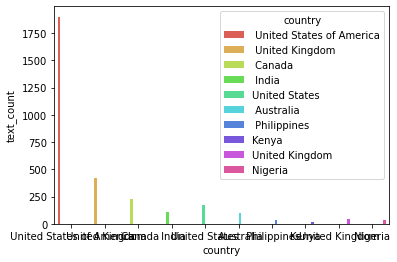

In [35]:
#sns.factorplot("country", hue="country", x_order=["polarity_text_pos", "polarity_text_neg", "polarity_text_neu"], data=twiter_my_polarity, palette="Paired")
sns.barplot(x = 'country', y = 'text_count', hue = 'country', data = twiter_my_polarity_top10,
            palette = 'hls',
            capsize = 0.05,             
            saturation = 8,             
            errcolor = 'gray', errwidth = 2,  
            ci = 'sd'   
            )